In [1]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
goog = pd.read_csv("./data/GOOG.csv", index_col=0, parse_dates=["Date"]) # index_col=0：将第一列作为索引，无行号，默认为None
goog.shape
goog.head()
goog.index

(3253, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

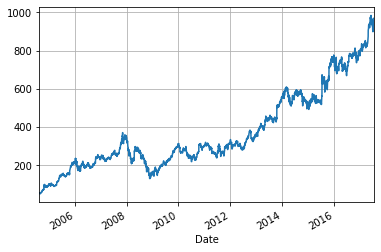

In [3]:
goog["Adj Close"].plot(grid = True)

In [4]:
aapl = pd.read_csv("./data/AAPL.csv", index_col=0, parse_dates=[0])
aapl.shape
aapl.head()

(9231, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.423252,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.401170,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.371726,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.380927,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.391969,18362400.0


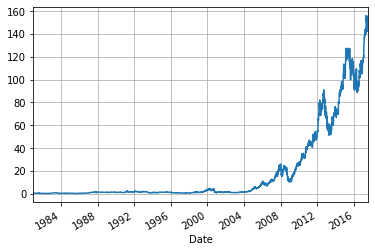

In [5]:
aapl["Adj Close"].plot(grid=True)

In [6]:
msft = pd.read_csv("./data/MSFT.csv", index_col=0, parse_dates=[0])
msft.shape
msft.head()

(7905, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.065242,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.067572,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.068737,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.066990,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.065825,47894400


**concat**

In [7]:
stocks = pd.concat([aapl["Adj Close"], msft["Adj Close"], goog["Adj Close"]], axis=1)
stocks.columns = ["AAPL", "MSFT", "GOOG"]
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
1980-12-12,0.423252,NaN,NaN
1980-12-15,0.401170,NaN,NaN
1980-12-16,0.371726,NaN,NaN
1980-12-17,0.380927,NaN,NaN
1980-12-18,0.391969,NaN,NaN


In [8]:
stocks = pd.DataFrame({"AAPL": aapl["Adj Close"].bfill(),
                      "MSFT": msft["Adj Close"].bfill(),
                      "GOOG": goog["Adj Close"].bfill()})
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
1980-12-12,0.423252,NaN,NaN
1980-12-15,0.401170,NaN,NaN
1980-12-16,0.371726,NaN,NaN
1980-12-17,0.380927,NaN,NaN
1980-12-18,0.391969,NaN,NaN


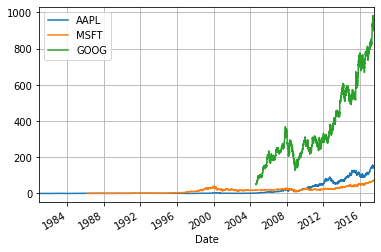

In [9]:
stocks.plot(grid=True)

In [10]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()] # 第一个非缺失的值
valid_stocks.head()

,AAPL,MSFT,GOOG
Date,,,
2004-08-19,1.981210,18.360205,49.982655
2004-08-20,1.987016,18.414366,53.952770
2004-08-23,2.005080,18.495850,54.495735
2004-08-24,2.061206,18.495850,52.239193
2004-08-25,2.132171,18.706341,52.802086


AAPL    float64
MSFT    float64
GOOG    float64
dtype: object

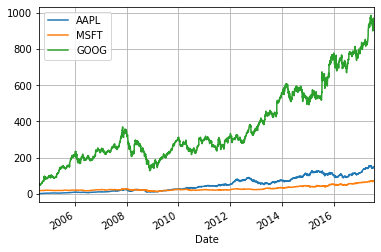

In [11]:
valid_stocks.plot(grid=True)
valid_stocks.dtypes

**月K线图**

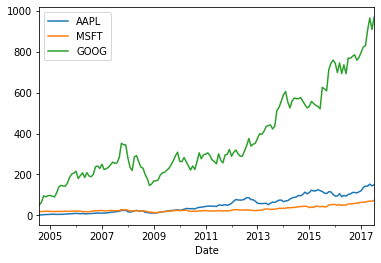

In [12]:
monthly_stocks = valid_stocks.resample("M").last()
monthly_stocks.plot()